In [1]:
import pandas as pd
import numpy as n
import seaborn as s
from sklearn.linear_model import LogisticRegression as l
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import train_test_split as t
from sklearn.metrics import accuracy_score as a

In [2]:
w=pd.read_csv("titanic.csv")

In [3]:
w.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
w.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

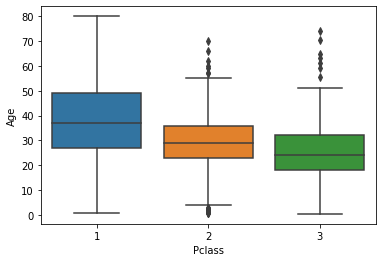

In [6]:
s.boxplot(w["Pclass"],w["Age"])

#### To fill null with values

In [7]:
def ageupdate(cols):
    age=cols[0]
    pclass=cols[1]
    if pd.isnull(age):
        if pclass==1:
            return 38
        elif pclass==2:
            return 29
        elif pclass==3:
            return 23
    return age

In [8]:
w["Age"]=w[["Age","Pclass"]].apply(ageupdate,axis=1)

In [9]:
sex=pd.get_dummies(w["Sex"],drop_first=True)

In [10]:
embark=pd.get_dummies(w["Embarked"],drop_first=True)

In [11]:
pclass=pd.get_dummies(w["Pclass"],drop_first=True)

In [12]:
w=pd.concat([w,embark,sex,pclass],axis=1)

#### To remove the non numerical values

In [13]:
w=w.drop(["Name","SibSp","Ticket","Cabin","PassengerId","Sex","Pclass","Embarked",2,3],axis=1)

In [14]:
x=w.drop("Survived",axis=1)
y=w["Survived"]

In [15]:
xtrain,xtest,ytrain,ytest=t(x,y,test_size=0.2,random_state=0)

In [16]:
reg=l()

In [17]:
reg.fit(xtrain,ytrain)

C:\Users\Sivant\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
ypred=reg.predict(xtest)

In [19]:
df=pd.DataFrame({"Actual":ytest,"Predicted":ypred})

In [20]:
print("Accuracy:",a(ytest,ypred))

Accuracy: 0.7932960893854749
